In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key 
#print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

## Perform API Calls

In [26]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


In [27]:
temp = []
cloud = []
wind = []
humidity = []
plot_lat = []

for x in range(len(cities)):
    #some cities generated by citipy are not in Open Weather database.  need error handling:
    try:
        # Get weather data
        weather_response = requests.get(url+"&q=" + cities[x])
        weather_json = weather_response.json()
        #print(f"The weather API responded with: {weather_json}.")
        print(f"City # {x+1} being processed: {weather_json['name']}, {weather_json['sys']['country']}.")
        temp.append(weather_json["main"]["temp"])
        cloud.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        humidity.append(weather_json["main"]["humidity"])
        plot_lat.append(weather_json["coord"]["lat"])
    except:
        continue
len(plot_lat)


City # 1 being processed: Alyangula, AU.
City # 2 being processed: Kavaratti, IN.
City # 3 being processed: Tokur, RU.
City # 4 being processed: Bambous Virieux, MU.
City # 5 being processed: Kuzedeyevo, RU.
City # 6 being processed: Gidole, ET.
City # 7 being processed: Conde, BR.
City # 8 being processed: Nikolskoye, RU.
City # 9 being processed: Talnakh, RU.
City # 10 being processed: Kloulklubed, PW.
City # 11 being processed: Cape Town, ZA.
City # 12 being processed: Albany, US.
City # 13 being processed: Katsuura, JP.
City # 14 being processed: Haines Junction, CA.
City # 15 being processed: Srivardhan, IN.
City # 16 being processed: Rikitea, PF.
City # 18 being processed: Awbari, LY.
City # 19 being processed: Palmas, BR.
City # 20 being processed: Ilulissat, GL.
City # 21 being processed: Jumla, NP.
City # 22 being processed: Dikson, RU.
City # 23 being processed: Semnan, IR.
City # 24 being processed: Palamos, ES.
City # 25 being processed: Lebu, ET.
City # 27 being processed:

City # 217 being processed: Karpathos, GR.
City # 218 being processed: Palmer, AU.
City # 219 being processed: Eyl, SO.
City # 221 being processed: Sesheke, NA.
City # 223 being processed: Georgetown, GY.
City # 226 being processed: Tessalit, ML.
City # 227 being processed: Kaseda, JP.
City # 228 being processed: Springbok, ZA.
City # 229 being processed: Moindou, NC.
City # 230 being processed: Cervo, BR.
City # 231 being processed: Zhangjiakou, CN.
City # 232 being processed: Tuatapere, NZ.
City # 233 being processed: Coihaique, CL.
City # 234 being processed: Usinsk, RU.
City # 236 being processed: Priekule, LV.
City # 237 being processed: Cidreira, BR.
City # 239 being processed: Ajdabiya, LY.
City # 241 being processed: Kastamonu, TR.
City # 242 being processed: Mount Isa, AU.
City # 243 being processed: Kaunas, LT.
City # 244 being processed: Vardo, US.
City # 245 being processed: Jalu, LY.
City # 246 being processed: Kaitangata, NZ.
City # 247 being processed: Rio Grande, BR.
Ci

City # 436 being processed: Kieta, PG.
City # 437 being processed: Arlit, NE.
City # 439 being processed: Kesova Gora, RU.
City # 440 being processed: Egvekinot, RU.
City # 441 being processed: Beroroha, MG.
City # 442 being processed: Buin, CL.
City # 443 being processed: Ishigaki, JP.
City # 444 being processed: Usakos, NA.
City # 445 being processed: Bambanglipuro, ID.
City # 446 being processed: Tateyama, JP.
City # 448 being processed: Kundiawa, PG.
City # 449 being processed: Ahipara, NZ.
City # 450 being processed: Puro, PH.
City # 451 being processed: Baykit, RU.
City # 452 being processed: Pitimbu, BR.
City # 453 being processed: Nurmahal, IN.
City # 454 being processed: Mvuma, ZW.
City # 457 being processed: Huron, US.
City # 458 being processed: Vao, EE.
City # 459 being processed: Tzaneen, ZA.
City # 460 being processed: Fujin, CN.
City # 462 being processed: Petropavlovsk-Kamchatskiy, RU.
City # 463 being processed: Tara, JP.
City # 464 being processed: Arman, RU.
City # 4

573

In [28]:
data_file = {"Latitude": plot_lat,
             "Temperture": temp, 
             "Cloudiness": cloud, 
             "Wind Speed": wind, 
             "Relative Humidity": humidity}
all_data_df = pd.DataFrame(data_file)
all_data_df.to_csv("DataOutput.csv", index=False)

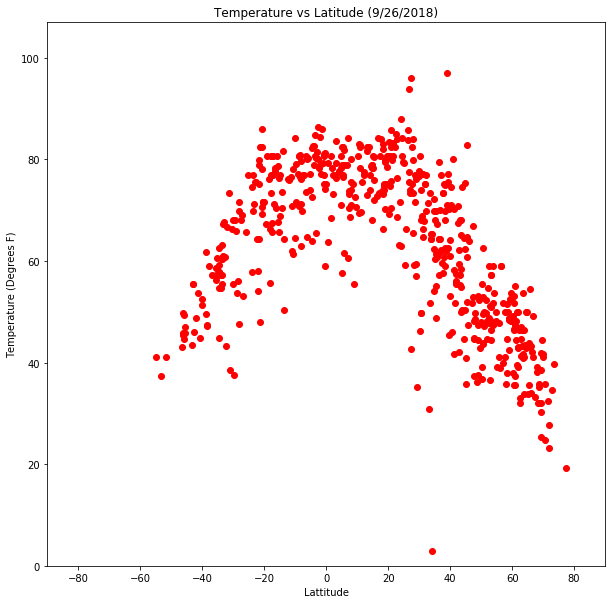

<Figure size 720x720 with 0 Axes>

In [29]:
plt.figure(figsize=(10,10))
plt.xlim(-90, 90)
plt.ylim(0, max(temp)+10)
plt.scatter(plot_lat, temp, marker="o", facecolors="red")
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
plt.xlabel("Lattitude")
plt.ylabel("Temperature (Degrees F)")
plt.title("Temperature vs Latitude (9/26/2018)")
plt.figure(figsize=(10,10))
plt.savefig("LatVsTemp.png")

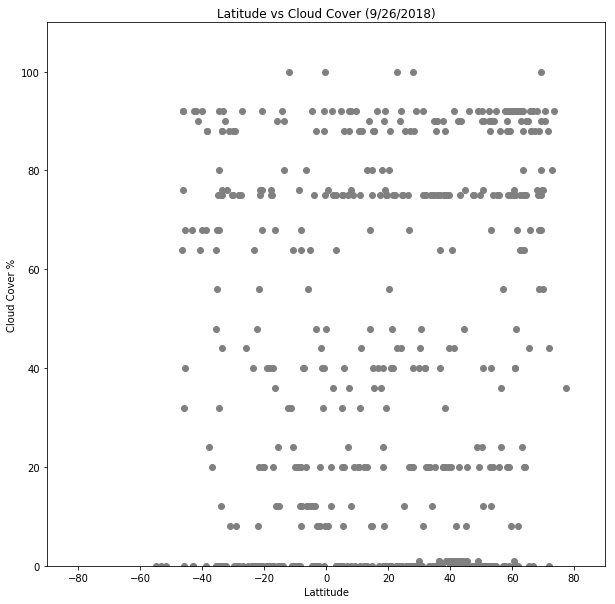

In [30]:
plt.figure(figsize=(10,10))
plt.xlim(-90, 90)
plt.ylim(0, max(cloud)+10)
plt.scatter(plot_lat, cloud, marker="o", facecolors="gray")
plt.xlabel("Lattitude")
plt.ylabel("Cloud Cover %")
plt.title("Latitude vs Cloud Cover (9/26/2018)")
plt.savefig("LatVsCloud.png")

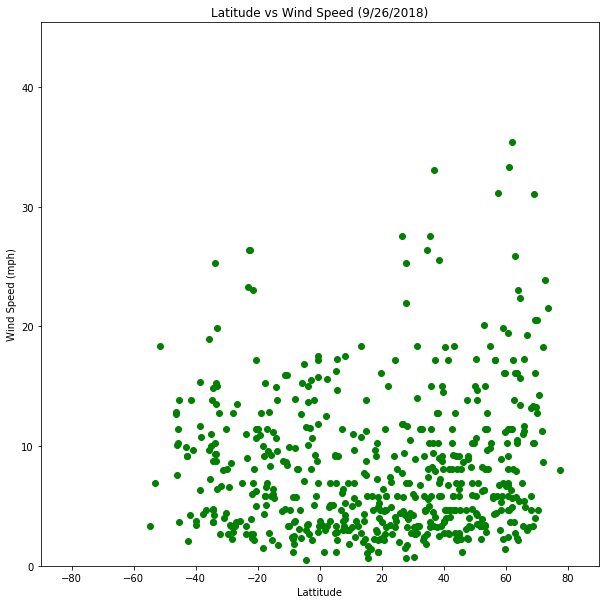

In [31]:
plt.figure(figsize=(10,10))
plt.xlim(-90, 90)
plt.ylim(0, max(wind)+10)
plt.scatter(plot_lat, wind, marker="o", facecolors="green")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed (9/26/2018)")
plt.savefig("LatVsWind.png")

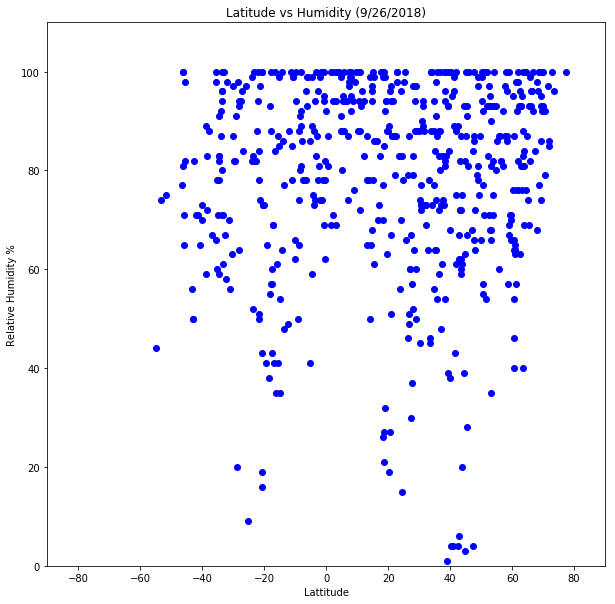

In [32]:
plt.figure(figsize=(10,10))
plt.xlim(-90, 90)
plt.ylim(0, max(humidity)+10)
plt.scatter(plot_lat, humidity, marker="o", facecolors="blue")
plt.xlabel("Lattitude")
plt.ylabel("Relative Humidity %")
plt.title("Latitude vs Humidity (9/26/2018)")
plt.savefig("LatVsHumid.png")